# 1. Data Cleaning and EDA

## Problem Statement

Housing price has been a key concern in many developed countries including the United States. In the project, we are aiming to developed a regression model to help us effectively predict the housing price in the Ames, Iowa.
<br/>
<br/>
With this model, it will be beneficial to both the buyer and seller as it will provide an estimate of the housing price based on the different features identified. It will help the buyer to set a realistic budget for their dream home while preventing any over inflation of price. It will benefit the seller by enabling them to identify key areas that they could target to make improvement so as value add before putting the apartment on sale.

In [1]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Content

- [Importing Data and Cleaning](#Importing-Data-and-Cleaning)
    - [Imputing Null Values](#Imputing-Null-Values)
    - [Converting Ordinal Features to Numeric](#Converting-Ordinal-Features-to-Numeric)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Age vs Sale Price](#Age-vs-Sale-Price)
    - [Porch vs Sale Price](#Porch-vs-Sale-Price)
    - [Garage vs Sale Price](#Garage-vs-Sale-Price)
    - [Living Area vs Sale Price](Living-Area-vs-Sale-Price)
    - [Basement vs Sale Price](#Basement-vs-Sale-Price)
    - [heteroscedasticity](#heteroscedasticity)
- [Converting Categorical to Numeric](#Converting-Categorical-to-Numeric)

## Importing Data and Cleaning

In [2]:
ames=pd.read_csv('./datasets/train.csv',index_col='Id')

In [3]:
ames

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000


In [4]:
ames.drop(['PID'],axis=1,inplace=True)

In [5]:
ames.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
pd.set_option("display.max_columns",85)
pd.set_option("display.max_rows",60)

In [7]:
ames.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Cond        114
Garage Yr Blt      114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
dtype: int64

### Imputing Null Values

In [8]:
to_drop=ames.columns[(ames.isnull().sum()>0) & (ames.isnull().sum()<10)]

In [9]:
ames.dropna(subset=to_drop,inplace=True)

In [10]:
ames.shape

(2048, 79)

3/2048=0.01
Dropping of 0.0001% of the rows is acceptable

In [11]:
ames[['Mas Vnr Type','Mas Vnr Area']][ames['Mas Vnr Type'].isnull()|ames['Mas Vnr Area'].isnull()]

,Mas Vnr Type,Mas Vnr Area
Id,,
2393,NaN,NaN
2383,NaN,NaN
539,NaN,NaN
518,NaN,NaN
2824,NaN,NaN
1800,NaN,NaN
1455,NaN,NaN
1120,NaN,NaN
1841,NaN,NaN


In [12]:
values_conv={'Mas Vnr Type':'NA',
            'Mas Vnr Area':0.0,}
ames.fillna(value=values_conv, inplace=True)

In [13]:
values_conv={'Pool QC':'NA',
            'Misc Feature':'NA',
            'Alley':'NA',
            'Fence':'NA',
            'Fireplace Qu':'NA'}

In [14]:
ames.fillna(value=values_conv, inplace=True)

In [15]:
ames.dtypes

MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street           object
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 79, dtype: object

In [16]:
garage_list=['Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond','Garage Yr Blt']

In [17]:
ames[garage_list][ames[garage_list].isnull().any(axis=1)]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Garage Yr Blt
Id,,,,,,
2243,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,NaN,NaN,NaN
2278,NaN,NaN,NaN,NaN,NaN,NaN
2235,NaN,NaN,NaN,NaN,NaN,NaN
2084,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
325,NaN,NaN,NaN,NaN,NaN,NaN
2880,NaN,NaN,NaN,NaN,NaN,NaN
2628,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ames['Garage Yr Blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [19]:
ames[ames['Garage Yr Blt']==2207]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2261,20,RL,68.0,8298,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NA,NA,NA,0,9,2007,New,267300


There is an anomaly on the year that the garage is build. So it is assumed to be 2007 where it's the year it has been remodelled and year sold

In [20]:
ames.loc[2261,'Garage Yr Blt']=2007

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

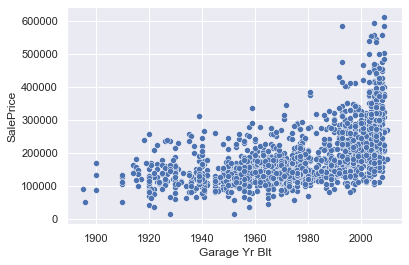

In [21]:
sns.scatterplot(data=ames,y='SalePrice',x='Garage Yr Blt')

It seem like that might be a linear relationship between the year the garage is build and sale price

In [22]:
#Garage Type is NA as there isn't a garage, hence all other garage 'feature' is 'NA'
values_conv={'Garage Type':'NA',
            'Gargage Yr Blt':'NA',
            'Garage Finish':'NA',
            'Garage Qual':'NA',
            'Garage Cond':'NA',
            'Garage Yr Blt':0}

In [23]:
ames.fillna(value=values_conv, inplace=True)

We will convert the year build to discrete where every 20years will increase the value by 1 so as to account for the housing without a garage while not losing the linear relationship

In [24]:
def garage_age(year):
    if year<=1900:
        return 0
    elif year<1920:
        return 1
    elif year<1940:
        return 2
    elif year<1960:
        return 3
    elif year<1980:
        return 4
    elif year<2000:
        return 5
    elif year>=2000:
        return 6

In [25]:
ames['Garage Age']=ames['Garage Yr Blt'].map(garage_age)

<AxesSubplot:xlabel='Garage Age', ylabel='SalePrice'>

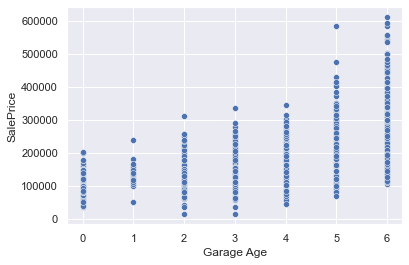

In [26]:
sns.scatterplot(data=ames,y='SalePrice',x='Garage Age')

In [27]:
ames.drop('Garage Yr Blt',axis=1,inplace=True)

In [28]:
bmst_list=['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']

In [29]:
ames[bmst_list][ames[bmst_list].isnull().any(axis=1)&ames[bmst_list].notna().any(axis=1)]

,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,Bsmt Exposure
Id,,,,,
445,Gd,TA,GLQ,NaN,No
1797,Gd,TA,Unf,Unf,NaN
67,Gd,TA,Unf,Unf,NaN
2780,Gd,TA,Unf,Unf,NaN


In [30]:
ames.loc[[1797,67,2780],'Bsmt Exposure']='No'

In [31]:
ames[bmst_list][ames[bmst_list].isnull().any(axis=1)]

,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,Bsmt Exposure
Id,,,,,
807,NaN,NaN,NaN,NaN,NaN
811,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN
1554,NaN,NaN,NaN,NaN,NaN
2740,NaN,NaN,NaN,NaN,NaN
2242,NaN,NaN,NaN,NaN,NaN
2745,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN


In [32]:
#Basement is NA as there isn't a basement, hence all other basement NaN's 'feature' is 'NA'
values_conv={'Bsmt Qual':'NA',
            'Bsmt Cond':'NA',
            'BsmtFin Type 1':'NA',
            'BsmtFin Type 2':'NA',
            'Bsmt Exposure':'NA',
}

In [33]:
ames.fillna(value=values_conv, inplace=True)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Count'>

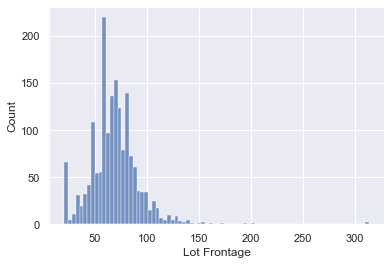

In [34]:
sns.histplot(data=ames,x='Lot Frontage')

In [35]:
ames['Lot Frontage'].describe()

count    1718.000000
mean       69.017462
std        23.228719
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

Null value in lot Frontage will be fill in with the train data's median after train test split so as to prevent data leakage.

In [36]:
ames['MS SubClass']=ames['MS SubClass'].map(str)

In [37]:
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Age
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500,4
544,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000,5
153,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000,3
318,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000,6
255,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500,3


In [38]:
ames['Electrical'].value_counts()

SBrkr    1866
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

### Converting Ordinal Features to Numeric

In [39]:
ames.columns[ames.dtypes==object]

Index(['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [40]:
ordinal={
    'Lot Shape':{'IR3':0,'IR2':1,'IR1':2,'Reg':3},
    'Land Slope':{'Sev':0,'Mod':1,'Gtl':2},
    'Exter Qual':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Exter Cond':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Bsmt Qual':{'NA':0,'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Bsmt Cond':{'NA':0,'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Bsmt Exposure':{'NA':0,'No':0,'Mn':1,'Av':2,'Gd':3},
    'BsmtFin Type 1':{'NA':0,'Unf':0,'LwQ':1,'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5},
    'BsmtFin Type 2':{'NA':0,'Unf':0,'LwQ':1,'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5},
    'Heating QC':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Electrical':{'Mix':0,'FuseP':1,'FuseF':2,'FuseA':3,'SBrkr':4},
    'Kitchen Qual':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Functional':{'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7},
    'Fireplace Qu':{'NA':0,'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Garage Finish':{'NA':0,'Unf':0,'RFn':1,'Fin':2},
    'Garage Qual':{'NA':0,'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Garage Cond':{'NA':0,'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Paved Drive':{'N':0,'P':1,'Y':2},
    'Pool QC':{'NA':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'Fence':{'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
}

In [41]:
for column,value in ordinal.items():
    ames[column]=ames[column].map(value)

In [42]:
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Age
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,NA,2,Lvl,AllPub,CulDSac,2,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,2,2,0,5,533.0,0,0.0,192.0,725.0,GasA,4,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,0,Attchd,1,2.0,475.0,2,2,2,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500,4
544,60,RL,43.0,11492,Pave,NA,2,Lvl,AllPub,CulDSac,2,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,3,2,0,5,637.0,0,0.0,276.0,913.0,GasA,4,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,2,Attchd,1,2.0,559.0,2,2,2,0,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000,5
153,20,RL,68.0,7922,Pave,NA,3,Lvl,AllPub,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,2,2,0,5,731.0,0,0.0,326.0,1057.0,GasA,2,Y,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,0,Detchd,0,1.0,246.0,2,2,2,0,52,0,0,0,0,0,0,NA,0,1,2010,WD,109000,3
318,60,RL,73.0,9802,Pave,NA,3,Lvl,AllPub,Inside,2,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,3,2,0,0,0.0,0,0.0,384.0,384.0,GasA,3,Y,4,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,7,0,0,BuiltIn,2,2.0,400.0,2,2,2,100,0,0,0,0,0,0,0,NA,0,4,2010,WD,174000,6
255,50,RL,82.0,14235,Pave,NA,2,Lvl,AllPub,Inside,2,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,1,3,0,0,0.0,0,0.0,676.0,676.0,GasA,2,Y,4,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,7,0,0,Detchd,0,2.0,484.0,2,2,0,0,59,0,0,0,0,0,0,NA,0,3,2010,WD,138500,3


In [43]:
ames.columns[ames.dtypes!=object]

Index(['Lot Frontage', 'Lot Area', 'Lot Shape', 'Land Slope', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence',
       'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice', 'Garage Age'],
      dtype='object')

## Exploratory Data Analysis

### Age vs Sale Price

In [44]:
ames['Age']=ames['Yr Sold']-ames['Year Built']

In [45]:
ames['Remod Age']=ames['Yr Sold']-ames['Year Remod/Add']

In [46]:
ames[['Age','Remod Age','SalePrice']]

,Age,Remod Age,SalePrice
Id,,,
109,34,5,130500
544,13,12,220000
153,57,3,109000
318,4,3,174000
255,110,17,138500
...,...,...,...
1587,1,1,298751
785,69,59,82500
916,81,59,177000


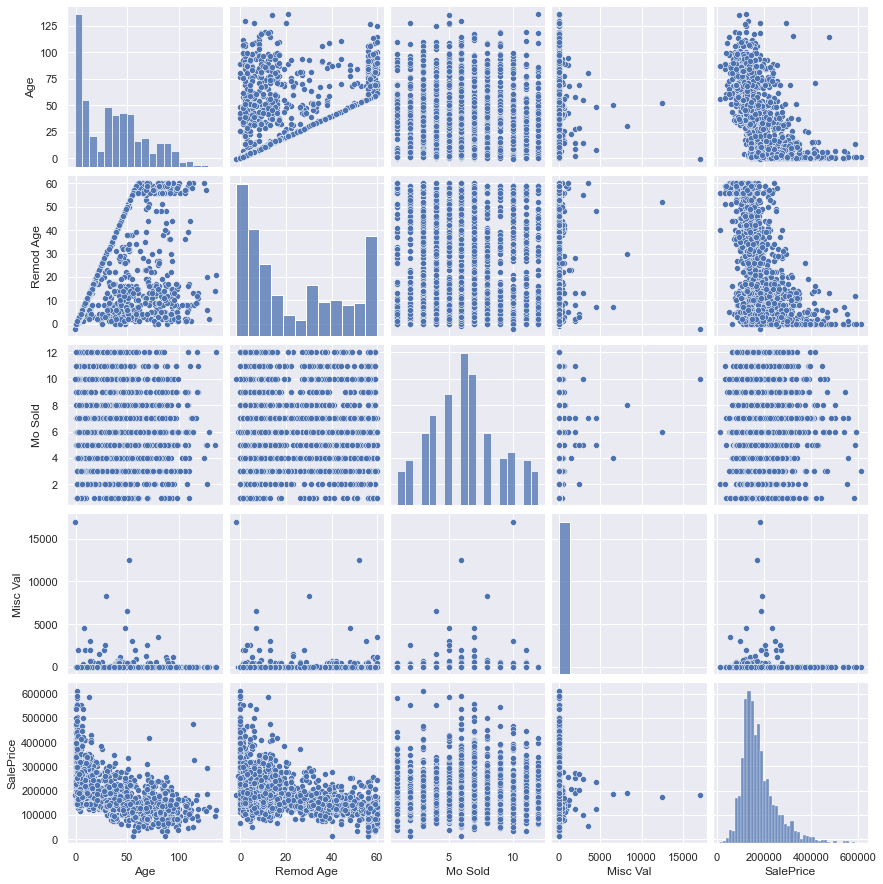

In [47]:
sns.pairplot(ames[['Age','Remod Age','Mo Sold','Misc Val','SalePrice']])

In [48]:
ames[['Age','Remod Age','Mo Sold','Misc Val','SalePrice']].corr()

,Age,Remod Age,Mo Sold,Misc Val,SalePrice
Age,1.000000,0.631031,0.001861,0.000251,-0.572284
Remod Age,0.631031,1.000000,-0.020512,0.002801,-0.551421
Mo Sold,0.001861,-0.020512,1.000000,0.019419,0.031868
Misc Val,0.000251,0.002801,0.019419,1.000000,-0.007398
SalePrice,-0.572284,-0.551421,0.031868,-0.007398,1.000000


Year built and year remod are convert to Age and Remod Age by subtracting it from the Year Sold. 
<br/>From the pairplot and correlation matrix, it can be seen that there is a strong correlation between the age of the apartment and remod age of the apartment at the time of sale.
<br/>There are little correlation for month sold and miscellaneous value with Sale Price, hence we will be dropping 'Mo Sold' and 'Misc Val'.

In [49]:
ames.drop(['Yr Sold','Year Built','Year Remod/Add','Mo Sold','Misc Val'],axis=1, inplace=True)

### Porch vs Sale Price

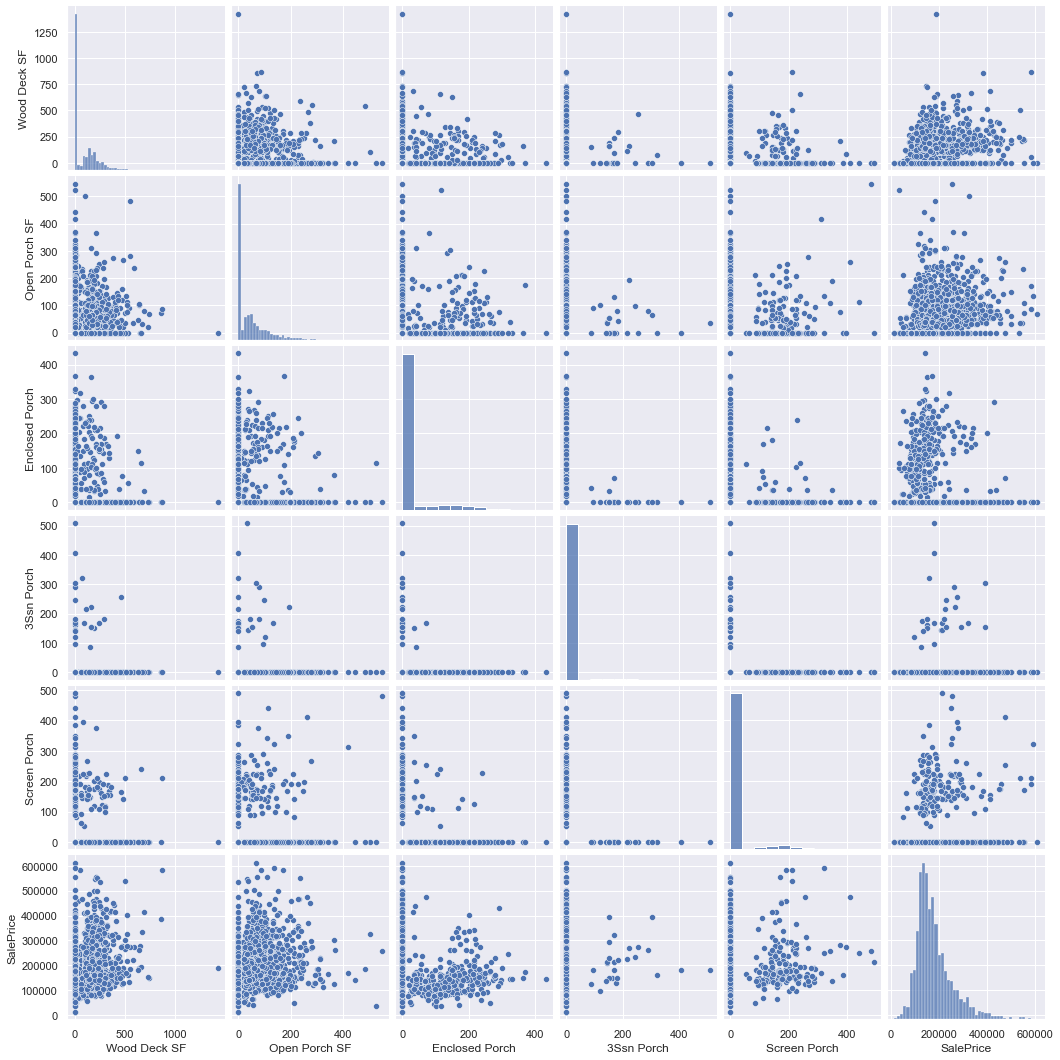

In [50]:
sns.pairplot(ames[['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','SalePrice']])

In [51]:
ames[['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','SalePrice']].corr()

,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,SalePrice
Wood Deck SF,1.000000,0.049641,-0.115642,-0.010897,-0.067916,0.327007
Open Porch SF,0.049641,1.000000,-0.075804,-0.007207,0.059874,0.332090
Enclosed Porch,-0.115642,-0.075804,1.000000,-0.032106,-0.068888,-0.135516
3Ssn Porch,-0.010897,-0.007207,-0.032106,1.000000,-0.029619,0.048755
Screen Porch,-0.067916,0.059874,-0.068888,-0.029619,1.000000,0.134652
SalePrice,0.327007,0.332090,-0.135516,0.048755,0.134652,1.000000


In [52]:
ames['3Ssn Porch'].describe()

count    2048.000000
mean        2.595215
std        25.247901
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3Ssn Porch, dtype: float64

From the pairplot and correlation matrix about, it shows relatively little correlation between 3Ssn Porch with SalePrice. Additionally, the data is heavily skewed and hence we will be dropping 3SSn Porch

In [53]:
ames.drop('3Ssn Porch',axis=1,inplace=True)

In [54]:
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Sale Type,SalePrice,Garage Age,Age,Remod Age
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,NA,2,Lvl,AllPub,CulDSac,2,Sawyer,RRAe,Norm,1Fam,2Story,6,8,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,2,2,0,5,533.0,0,0.0,192.0,725.0,GasA,4,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,0,Attchd,1,2.0,475.0,2,2,2,0,44,0,0,0,0,0,NA,WD,130500,4,34,5
544,60,RL,43.0,11492,Pave,NA,2,Lvl,AllPub,CulDSac,2,SawyerW,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,3,2,0,5,637.0,0,0.0,276.0,913.0,GasA,4,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,2,Attchd,1,2.0,559.0,2,2,2,0,74,0,0,0,0,0,NA,WD,220000,5,13,12
153,20,RL,68.0,7922,Pave,NA,3,Lvl,AllPub,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,2,2,0,5,731.0,0,0.0,326.0,1057.0,GasA,2,Y,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,0,Detchd,0,1.0,246.0,2,2,2,0,52,0,0,0,0,0,NA,WD,109000,3,57,3
318,60,RL,73.0,9802,Pave,NA,3,Lvl,AllPub,Inside,2,Timber,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,3,2,0,0,0.0,0,0.0,384.0,384.0,GasA,3,Y,4,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,7,0,0,BuiltIn,2,2.0,400.0,2,2,2,100,0,0,0,0,0,0,NA,WD,174000,6,4,3
255,50,RL,82.0,14235,Pave,NA,2,Lvl,AllPub,Inside,2,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,1,3,0,0,0.0,0,0.0,676.0,676.0,GasA,2,Y,4,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,7,0,0,Detchd,0,2.0,484.0,2,2,0,0,59,0,0,0,0,0,NA,WD,138500,3,110,17


### Garage vs Sale Price

In [55]:
garage=['Garage Age','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond','SalePrice']

In [56]:
ames[garage].corr()

,Garage Age,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,SalePrice
Garage Age,1.000000,0.535810,0.724511,0.692756,0.665907,0.637271,0.550817
Garage Finish,0.535810,1.000000,0.475898,0.418900,0.283137,0.272623,0.549081
Garage Cars,0.724511,0.475898,1.000000,0.893161,0.556314,0.540331,0.648103
Garage Area,0.692756,0.418900,0.893161,1.000000,0.551752,0.531697,0.650000
Garage Qual,0.665907,0.283137,0.556314,0.551752,1.000000,0.899850,0.299764
Garage Cond,0.637271,0.272623,0.540331,0.531697,0.899850,1.000000,0.272720
SalePrice,0.550817,0.549081,0.648103,0.650000,0.299764,0.272720,1.000000


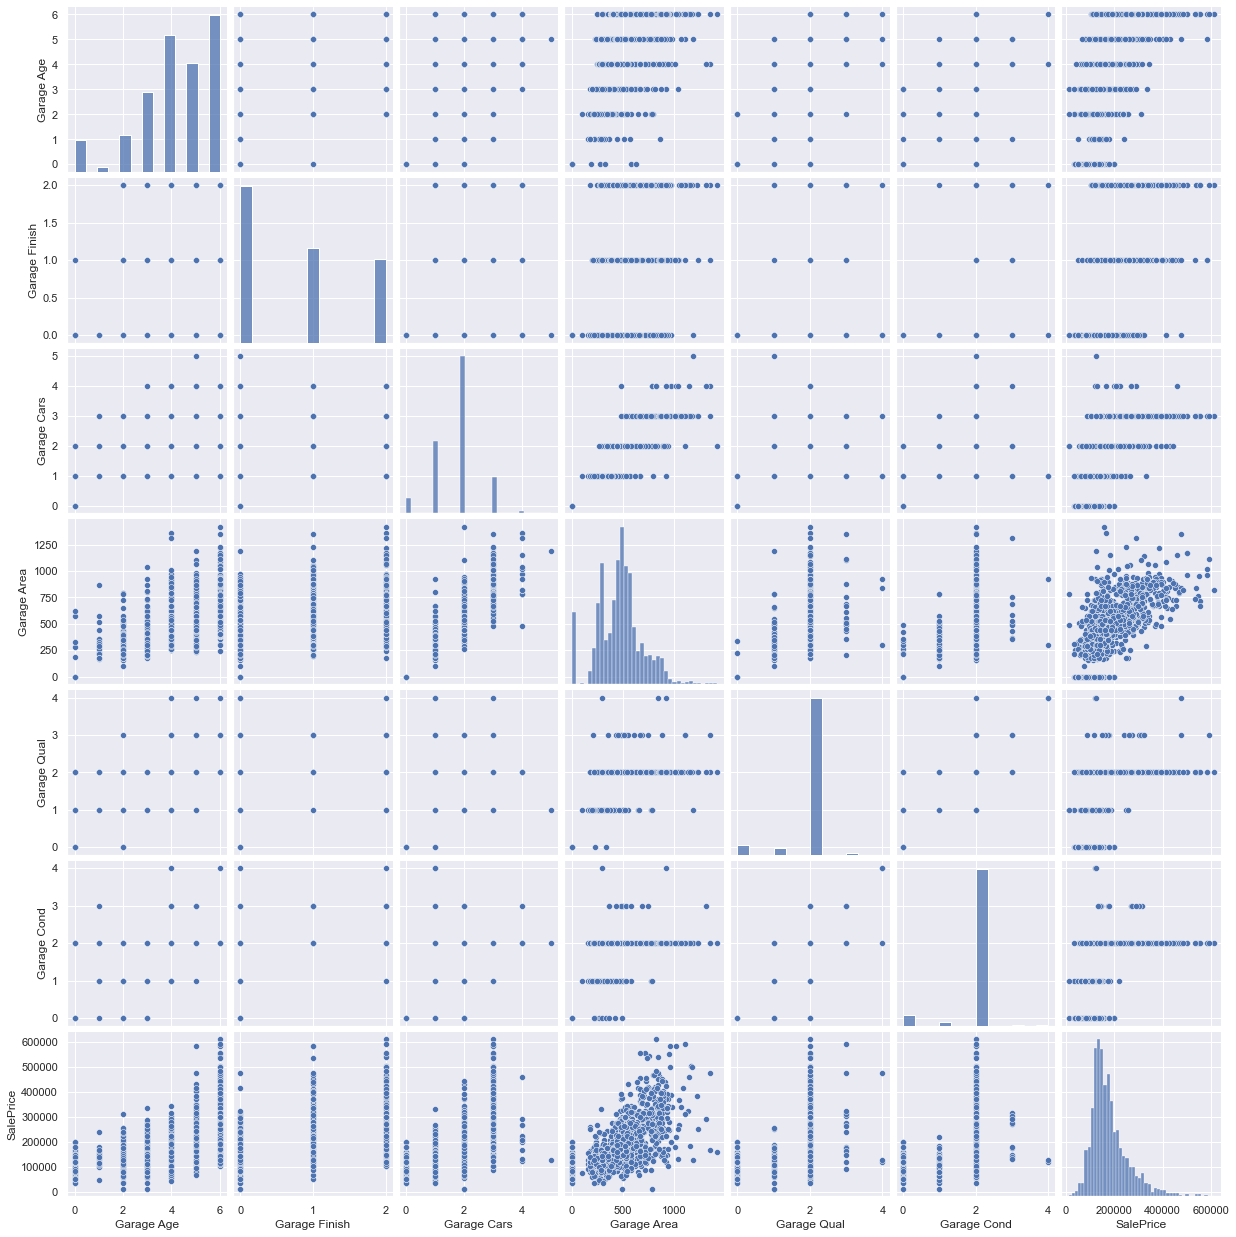

In [57]:
sns.pairplot(ames[garage])

From the pairplot and correlation matrix. It shows that there is a high correlation between all the variables and Sale Price. Additionally, as we suspected above, there is a high correlation for the Garage Age with Saleprice after conversion of Year to age. We will also be dropping 'Garage Area' since it has a very high correlation with 'Garage Cars'and Garage Cars '0' value have lesser impact in skewing the data

In [58]:
ames.drop(['Garage Area'],axis=1, inplace=True)

### Living Area vs Sale Price

In [59]:
living_area=['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','SalePrice']

In [60]:
ames[living_area].corr()

,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,SalePrice
1st Flr SF,1.000000,-0.269430,-0.010225,0.556445,0.621181
2nd Flr SF,-0.269430,1.000000,0.014643,0.644109,0.249091
Low Qual Fin SF,-0.010225,0.014643,1.000000,0.107095,-0.041650
Gr Liv Area,0.556445,0.644109,0.107095,1.000000,0.698046
SalePrice,0.621181,0.249091,-0.041650,0.698046,1.000000


In [61]:
living_area=['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','SalePrice']

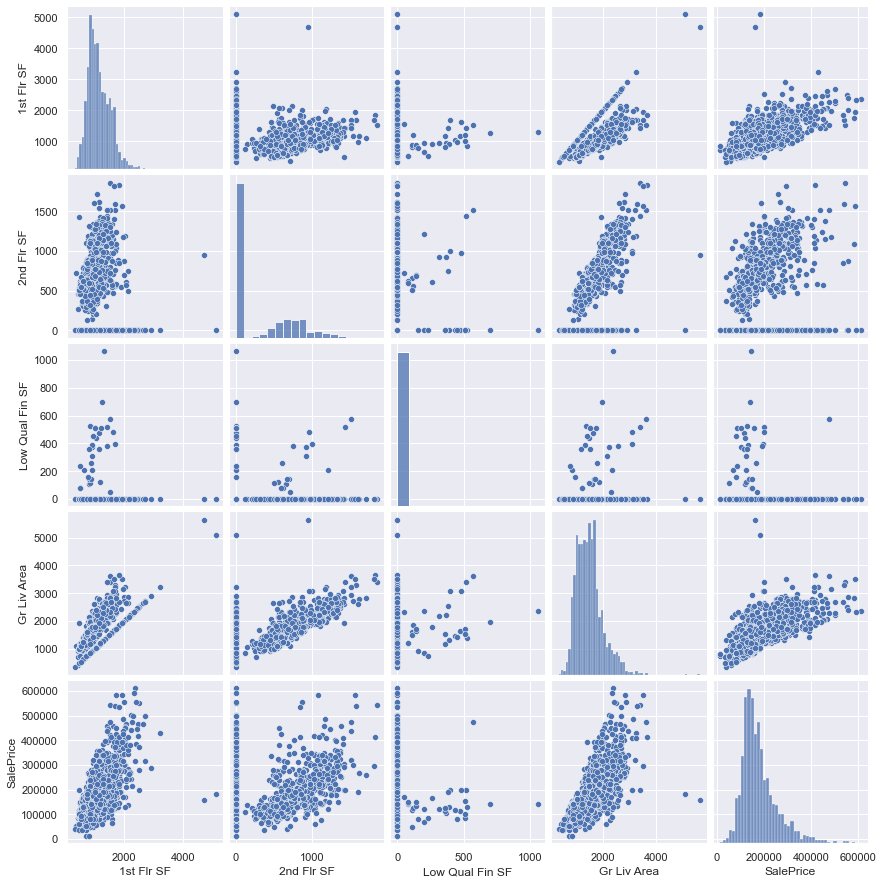

In [62]:
sns.pairplot(ames[living_area])

From the scatterplot of 1st Floor Square Feet and Grade Living Area, it have seem like there might be some heteroscedasticity (with the increase in square feet the variation in price seem to increase). We will be addressing this later.

### Basement vs Sale Price

In [63]:
basement=[
        'BsmtFin SF 1',
        'BsmtFin SF 2',
        'Bsmt Unf SF',
        'Total Bsmt SF',
        'SalePrice'
]

In [64]:
ames[basement].corr()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,SalePrice
BsmtFin SF 1,1.000000,-0.050367,-0.474361,0.538830,0.424463
BsmtFin SF 2,-0.050367,1.000000,-0.231714,0.086272,0.016393
Bsmt Unf SF,-0.474361,-0.231714,1.000000,0.418433,0.191090
Total Bsmt SF,0.538830,0.086272,0.418433,1.000000,0.631507
SalePrice,0.424463,0.016393,0.191090,0.631507,1.000000


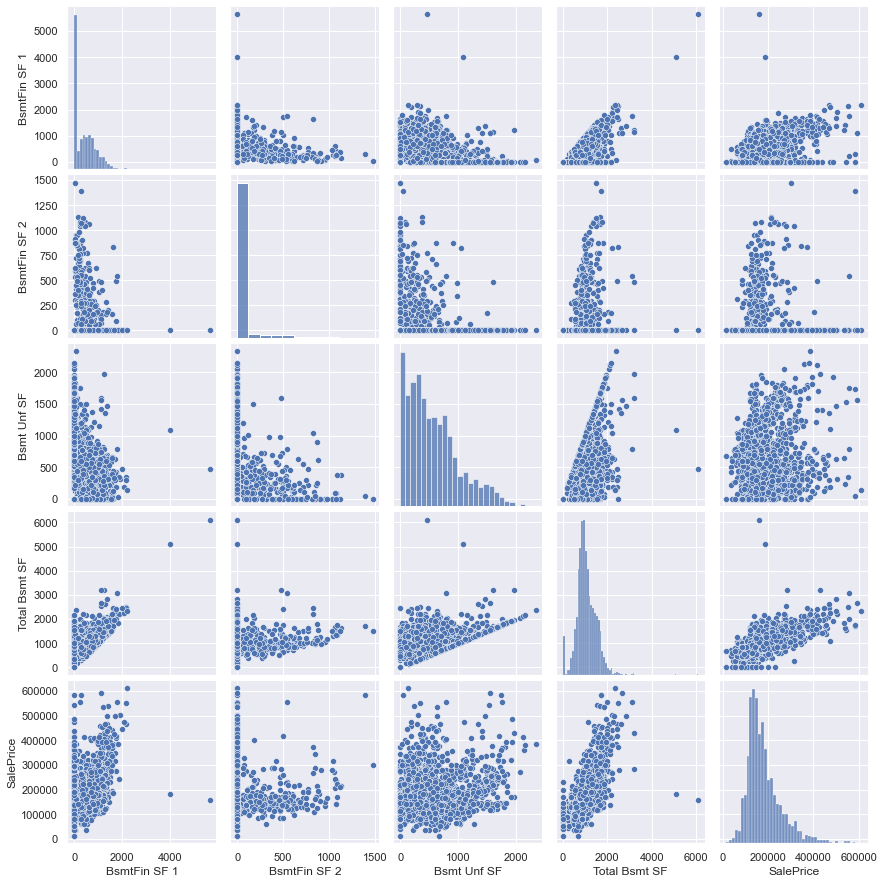

In [65]:
sns.pairplot(ames[basement])

From the correlation matrix and scatterplot. It shows that BsmtFin SF 1 and Total Bsmt SF have a high correlationship.

### Heteroscedasticity

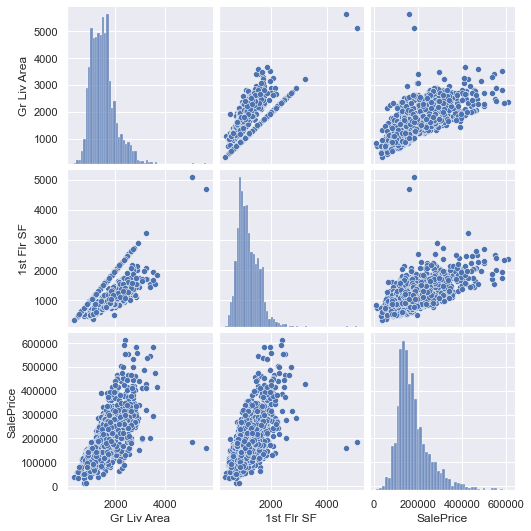

In [66]:
sns.pairplot(ames[['Gr Liv Area','1st Flr SF','SalePrice']])

In [67]:
log_scale=['Gr Liv Area','1st Flr SF','SalePrice']
for column in log_scale:
    ames['log_'+column]=np.log(ames[column])
    ames.drop(columns=column,inplace=True)

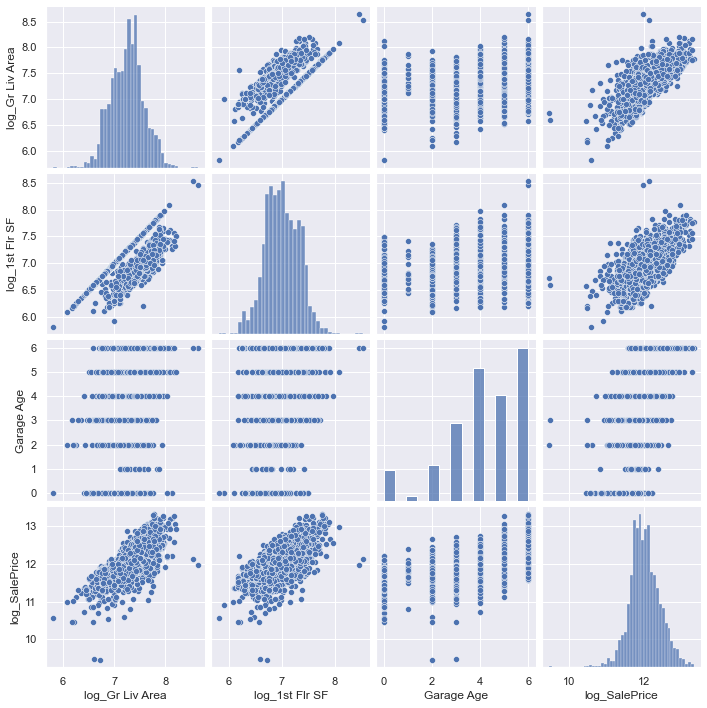

In [68]:
sns.pairplot(ames[['log_Gr Liv Area','log_1st Flr SF','Garage Age','log_SalePrice']])

From the scatterplot of the log of SalePrice, Grade Living Area and 1st Floor Squared feet, the relationship seem more linear with lesser variance

## Converting Categorical to Numeric

In [69]:
for column in ames.columns[ames.dtypes==object]:
    if ames[column].value_counts()[0]>2000:
        print(column)
        ames.drop(column,axis=1,inplace=True)

Street
Utilities
Condition 2
Roof Matl
Heating


Dropping heavily skewed categorical data. Similar data column will be drop for the test data

In [70]:
ames.columns[ames.dtypes==object]

Index(['MS SubClass', 'MS Zoning', 'Alley', 'Land Contour', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
       'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type'],
      dtype='object')

In [71]:
ames=pd.get_dummies(data=ames,columns=ames.columns[ames.dtypes==object])

In [72]:
NA_column=[column for column in ames.columns if 'NA' in column]

In [73]:
NA_column

['Alley_NA',
 'Neighborhood_NAmes',
 'Mas Vnr Type_NA',
 'Garage Type_NA',
 'Misc Feature_NA']

In [74]:
NA_column.remove('Neighborhood_NAmes')

In [75]:
NA_column

['Alley_NA', 'Mas Vnr Type_NA', 'Garage Type_NA', 'Misc Feature_NA']

In [76]:
ames.drop(NA_column,axis=1,inplace=True)

In [77]:
ames.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,...,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,NaN,13517,2,2,6,8,289.0,3,2,2,2,0,5,533.0,0,0.0,192.0,725.0,4,4,754,0,0.0,0.0,2,1,3,1,3,6,7,0,0,1,2.0,2,2,2,0,44,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
544,43.0,11492,2,2,7,5,132.0,3,2,3,2,0,5,637.0,0,0.0,276.0,913.0,4,4,1209,0,1.0,0.0,2,1,4,1,3,8,7,1,2,1,2.0,2,2,2,0,74,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
153,68.0,7922,3,2,5,7,0.0,2,3,2,2,0,5,731.0,0,0.0,326.0,1057.0,2,4,0,0,1.0,0.0,1,0,3,1,3,5,7,0,0,0,1.0,2,2,2,0,52,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
318,73.0,9802,3,2,5,5,0.0,2,2,3,2,0,0,0.0,0,0.0,384.0,384.0,3,4,700,0,0.0,0.0,2,1,3,1,2,7,7,0,0,2,2.0,2,2,2,100,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
255,82.0,14235,2,2,6,8,0.0,2,2,1,3,0,0,0.0,0,0.0,676.0,676.0,2,4,614,0,0.0,0.0,2,0,3,1,2,6,7,0,0,0,2.0,2,2,0,0,59,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [78]:
ames.to_csv('./datasets/train_clean.csv',index_label='Id')